In [1]:
numbers = '23456789TJQKA'
colors = '红黑方梅'
joker = 'Xy'
def numbers_value(n):
    position_value = numbers.find(n) + 2
    
    if n == 'X' or n == 'y':
        return list(range(1,15))
    
    if n == 'A':
        return position_value, 1
    
    else:
        return position_value,
    

In [2]:
numbers_value('X')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [3]:
from itertools import product
one_suite_cards = [
    c+n for c, n in product(numbers,colors)
]
one_suite_cards.append('XX')
one_suite_cards.append('yy')

In [4]:
len(one_suite_cards * 2)

108

In [5]:
len(one_suite_cards)

54

In [6]:
import random
random.shuffle(one_suite_cards)

In [7]:
def distribute_hand(people_n,card_n = 3,with_joker=False,multi_suite = False):
    
#     card_n = 3
    
    
    
    one_suite_cards = [
        c+n for c, n in product(numbers,colors)
    ]
    
    if with_joker:
        one_suite_cards.append('XX')
        one_suite_cards.append('yy')
    
    if multi_suite:
        suite_nums = int(( people_n * card_n ) * 1.0 / 54) + 1
        suite_cards = one_suite_cards * suite_nums
#     print(len(suite_cards))
    
        random.shuffle(suite_cards)
        random_hand = []
    #     start = 0
    #     for i in range(people_n):
    #         start += i * card_n
    #         random_hand.append(one_suite_cards[start:start+card_n])

        random_hand = [suite_cards[i * card_n:i * card_n + card_n] for i in range(people_n)]
    
    else:
        random.shuffle(one_suite_cards)
        random_hand = []
        start,j = 0,0
        for i in range(people_n):
            start = j * card_n
#             print('j:{},start:{},card_n:{}'.format(j,start,card_n))
            j += 1
#             print(start)
            if start + card_n > len(one_suite_cards):
                random.shuffle(one_suite_cards)
#                 print(one_suite_cards)
                start = 0
                j = 0
            random_hand.append(one_suite_cards[start:start+card_n])
#             print(one_suite_cards[start:start+card_n])
#             print(start,start+card_n)
            

    return random_hand

    

In [8]:
random_hand = distribute_hand(78,True,False)

In [9]:
len(random_hand)

78

In [30]:
def is_flush(hand): #同花
    
    if len(set(c for _, c in hand)) == 2:
        for _,c in hand:
            if c == 'X'or c == 'y':
                return True
        
    return len(set(c for _, c in hand)) == 1

In [31]:
is_flush(['9红',
 'XX',
 '4红',])

True

In [32]:
def ascend(numbers):
    sorted_n = sorted(numbers)
    return sorted_n[2] - sorted_n[1] == sorted_n[1] - sorted_n[0] == 1

def is_straight(hand): #拖拉机

    possible_numbers = [numbers_value(n) for n,_ in hand]
    
#     print (possible_numbers)
    
    all_combination = list(product(*possible_numbers))
#     print (all_combination)
    return any(ascend(h) for h in all_combination)
   

In [33]:
is_straight(['3红',
 '4黑',
 '5方',])

True

In [43]:
from collections import Counter
FLUSH,STRIGHT = 'flush','straight'
total_hand = 10000
def get_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,3,True,True):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            elif is_straight(hand):
                poker_counter[STRIGHT] += 1
    return poker_counter
    

In [44]:
poker_counter = get_poker_env(3)

In [45]:
poker_counter[FLUSH] / total_hand

0.2131

In [46]:
poker_counter[STRIGHT] / total_hand

0.1673

In [47]:
rate = poker_counter[FLUSH] / poker_counter[STRIGHT] 

In [48]:
rate

1.273759713090257

In [49]:
from tqdm import tqdm_notebook

In [50]:
people_numbers= range(2, 17)
r = 50000
rates = []
for n in tqdm_notebook(people_numbers):
    result = get_poker_env(n,r)
    rates.append(result[FLUSH] / result[STRIGHT] )

/var/folders/dr/3bsmb4j928bcx76mh_1dfx1r0000gn/T/ipykernel_6722/1836153485.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(people_numbers):


  0%|          | 0/15 [00:00<?, ?it/s]

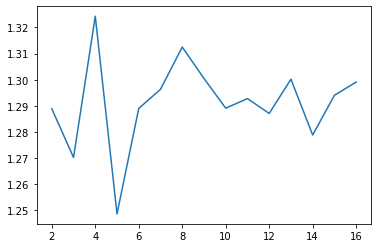

In [51]:
import matplotlib.pyplot as plt
plt.plot(people_numbers, rates)


# 五张牌

In [51]:
# def distribute_hand(people_n,card_n = 5,with_joker=False,multi_suite = False): #发牌函数
    
# #     card_n = 5
    
    
    
#     one_suite_cards = [
#         c+n for c, n in product(numbers,colors)
#     ]
    
#     if with_joker:
#         one_suite_cards.append('JK')
#         one_suite_cards.append('jk')
    
#     if multi_suite:
#         suite_nums = int(( people_n * card_n ) * 1.0 / 54) + 1
#         suite_cards = one_suite_cards * suite_nums
    
#         random.shuffle(suite_cards)
#         random_hand = []
#         random_hand = [suite_cards[i * card_n:i * card_n + card_n] for i in range(people_n)]
    
#     else:
#         random.shuffle(one_suite_cards)
#         random_hand = []
#         start,j = 0,0
#         for i in range(people_n):
#             start = j * card_n
#             j += 1
#             if start + card_n > len(one_suite_cards):
#                 random.shuffle(one_suite_cards)
#                 start = 0
#                 j = 0
#             random_hand.append(one_suite_cards[start:start+card_n])

#     return random_hand

    

In [150]:
def ascend(numbers):
    sorted_n = sorted(numbers)
    return sorted_n[4] - sorted_n[3] == sorted_n[3] - sorted_n[2] == sorted_n[2] - sorted_n[1] == sorted_n[1] - sorted_n[0] == 1

def is_straight(hand): #拖拉机

    possible_numbers = [numbers_value(n) for n,_ in hand]
    
#     print (possible_numbers)
    
    all_combination = list(product(*possible_numbers))
#     print (all_combination)
    return any(ascend(h) for h in all_combination)

In [151]:
def is_straight_flush(hand): # 五个花色相同并且还是顺子
    return is_straight(hand) and is_flush(hand)

In [152]:
def asc(numbers):
    sorted_n = sorted(numbers)
    return len(set(sorted_n[1:-1])) == 1 and (sorted_n[4] - sorted_n[3] <= 1 or sorted_n[1] - sorted_n[0] <= 1)
def is_four_of_one_kind(hand): # 四个数字相同
#     print(hand)
    possible_numbers = [numbers_value(n) for n,_ in hand]
#     print(possible_numbers)
    all_combination = list(product(*possible_numbers))
    return any(asc(h) for h in all_combination)
    

In [153]:
is_four_of_one_kind(['A红', 'A方', 'A方', 'XX', '4红'])

True

In [154]:
def aaa_bb(numbers):
    sorted_n = sorted(numbers)
#     print (sorted_n)
#     print (sorted_n[:2])
    return len(set(sorted_n[:2])) == 1 and len(set(sorted_n[-2:])) == 1 and ((sorted_n[2] == sorted_n[0]) or (sorted_n[2] == sorted_n[-1]))

def is_full_house(hand):
#     print(hand)
    possible_numbers = [numbers_value(n) for n,_ in hand]
#     print(possible_numbers)
    all_combination = list(product(*possible_numbers))
#     print(all_combination)
    return any(aaa_bb(h) for h in all_combination)

In [155]:
is_full_house(['A红', '2方', 'A方', 'XX', 'yy'])

True

In [156]:
def aaa(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    return len(set(sorted_n[:3])) == 1 or len(set(sorted_n[1:4])) == 1 or len(set(sorted_n[2:5])) == 1
def is_three_of_a_kind(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(aaa(h) for h in all_combination)

In [157]:
is_three_of_a_kind(['8红', '7方', '2方', '7梅', 'yy'])

True

In [158]:
sorted_n=[1, 2, 3, 4, 5]
sorted_n[3:5] 

[4, 5]

In [159]:
def aa(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    if not len(set(sorted_n)) == 3:
        return False
    pair_count = set()
    if len(set(sorted_n[:2])) == 1 :
        pair_count.add(0)
        pair_count.add(1)
    if len(set(sorted_n[1:3])) == 1:
        pair_count.add(1)
        pair_count.add(2)
    if len(set(sorted_n[2:4])) == 1:
        pair_count.add(2)
        pair_count.add(3)
    if len(set(sorted_n[3:5])) == 1:
        pair_count.add(3)
        pair_count.add(4)
    if len(pair_count) == 4:
#         print(pair_count)
        return True
    return False
def is_two_pair(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(aa(h) for h in all_combination)

In [160]:
is_two_pair(['2红', '8方', '3方', '2梅', 'yy'])

True

In [161]:
def a(numbers):
    sorted_n = sorted(numbers)
#     print(sorted_n)
    return len(set(sorted_n)) == 4
def is_pair(hand):
    possible_numbers = [numbers_value(n) for n,_ in hand]
    all_combination = list(product(*possible_numbers))
    return any(a(h) for h in all_combination)

In [162]:
is_pair(['2红', '8方', '3方', '2梅', 'yy'])

True

In [163]:
from collections import Counter
FOUR_OF_ONE_KIND,STRIGHT_FLUSH,FLUSH,STRIGHT,FULL_HOUSE,THREE_OF_ONE_KIND,TWO_PAIR,PAIR = 'four_of_one_kind','straight_flush','flush','stright','full_house','three_of_one_kind','two_pair','pair'
total_hand = 10000
def get_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,5,True,True):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            if is_straight(hand):
                poker_counter[STRIGHT] += 1
            if is_straight_flush(hand):
                poker_counter[STRIGHT_FLUSH] += 1
            if is_four_of_one_kind(hand):
                poker_counter[FOUR_OF_ONE_KIND] += 1
            if is_full_house(hand):
                poker_counter[FULL_HOUSE] += 1
            if is_three_of_a_kind(hand):
                poker_counter[THREE_OF_ONE_KIND] += 1
            if is_two_pair(hand):
                poker_counter[TWO_PAIR] += 1
            if is_pair(hand):
                poker_counter[PAIR] += 1       
    return poker_counter

In [164]:
result = get_poker_env(10)

In [165]:
result

Counter({'pair': 53174,
         'two_pair': 10160,
         'three_of_one_kind': 8241,
         'four_of_one_kind': 1662,
         'stright': 1128,
         'full_house': 575,
         'flush': 331,
         'straight_flush': 13})

In [167]:
def get_one_suite_poker_env(people,round_number=10000):
    poker_counter = Counter()
#     FLUSH,STRIGHT = 'flush','straight'
    total_hand = 0
    for t in range(round_number):
        for hand in distribute_hand(people,5,True,False):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            if is_straight(hand):
                poker_counter[STRIGHT] += 1
            if is_straight_flush(hand):
                poker_counter[STRIGHT_FLUSH] += 1
            if is_four_of_one_kind(hand):
                poker_counter[FOUR_OF_ONE_KIND] += 1
            if is_full_house(hand):
                poker_counter[FULL_HOUSE] += 1
            if is_three_of_a_kind(hand):
                poker_counter[THREE_OF_ONE_KIND] += 1
            if is_two_pair(hand):
                poker_counter[TWO_PAIR] += 1
            if is_pair(hand):
                poker_counter[PAIR] += 1       
    return poker_counter

In [168]:
one_suite_result = get_one_suite_poker_env(10)

In [169]:
one_suite_result

Counter({'pair': 52998,
         'four_of_one_kind': 1718,
         'full_house': 604,
         'three_of_one_kind': 8089,
         'two_pair': 10044,
         'stright': 1145,
         'flush': 360,
         'straight_flush': 15})